In [2]:
import os
import sys
sys.path.append(os.path.abspath(".."))

In [3]:
from utils.data_loader import load_cifar10

root_folder = './../data/CIFAR-10/cifar-10-batches-py'  
X_train, y_train, X_test, y_test = load_cifar10(root_folder)

print("Train images shape:", X_train.shape)   # (50000, 32, 32, 3)
print("Train labels shape:", y_train.shape)   # (50000,)
print("Test images shape:", X_test.shape)     # (10000, 32, 32, 3)
print("Test labels shape:", y_test.shape)     # (10000,)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000,)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


In [4]:
# Normalize pixel values to 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

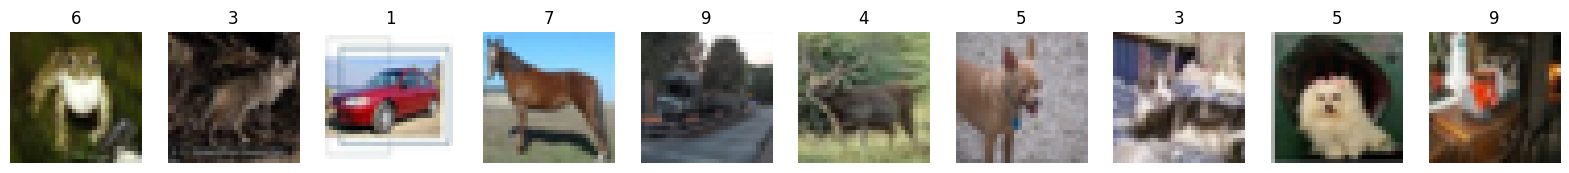

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cifar_samples(images, labels, num_samples=10):
    indices = np.random.choice(len(images), num_samples, replace=False)
    plt.figure(figsize=(num_samples*2, 2))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[idx])
        plt.title(f"{labels[idx]}")
        plt.axis("off")
    plt.show()

plot_cifar_samples(X_train, y_train)

In [6]:
from utils.train_utils import train_model

# Train with the correct input shape for CIFAR-10: (32, 32, 3)
lenet, lenet_history = train_model(
    train_images=X_train, 
    train_labels=y_train, 
    test_images=X_test, 
    test_labels=y_test,  
    model_name="lenet", 
    epochs=10, 
    batch_size=32, 
    input_shape=(32, 32, 3)
)

c:\Users\sonia\anaconda3\envs\fragile_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.3385 - loss: 1.8102 - val_accuracy: 0.4836 - val_loss: 1.4172
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5082 - loss: 1.3726 - val_accuracy: 0.5371 - val_loss: 1.3009
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5571 - loss: 1.2441 - val_accuracy: 0.5632 - val_loss: 1.2329
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5871 - loss: 1.1580 - val_accuracy: 0.5585 - val_loss: 1.2536
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6126 - loss: 1.0815 - val_accuracy: 0.5853 - val_loss: 1.1758
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6394 - loss: 1.0219 - val_accuracy: 0.6078 - val_loss: 1.1114
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6573 - loss: 0.9696 - val_accuracy: 0.6175 - val_loss: 1.0915
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6772 - l

In [7]:
np.random.seed(7)
subset_size = 100
all_indices = np.arange(len(X_train))
subset_indices = np.random.choice(all_indices, subset_size, replace=False)
train_images_subset = X_train[subset_indices]
train_labels_subset = y_train[subset_indices]

In [ ]:
from utils.ground_truth_influence import compute_ground_truth_influences

# Select a test sample 
test_index = 4
test_sample = X_test[test_index]
test_label = y_test[test_index]

ground_truth_influences = compute_ground_truth_influences(
    lenet, train_images_subset, train_labels_subset, test_sample, test_label,
    sample_indices=list(range(subset_size)), fine_tune_epochs=1, batch_size=128
)

print(ground_truth_influences)

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import tensorflow as tf

from utils.influence_functions import compute_influence_and_meta_on_dataset

# Define loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compute standard influence estimates on a subset of training data (first 10 samples)
std_influences, meta_influences = compute_influence_and_meta_on_dataset(
    lenet, train_images_subset, train_labels_subset, test_sample, test_label, loss_fn,
    damping=0.1, sample_indices=list(range(subset_size)), epsilon=1e-3
)

std_influences = -std_influences

scaling_factor = np.median(np.abs(ground_truth_influences)) / np.median(np.abs(std_influences))
std_influences = std_influences * scaling_factor

print(std_influences)

[-8.91209766e-02 -1.63553760e-03 -6.11031777e-04  9.90064144e-02
 -8.02854821e-02 -1.20493889e-01 -2.19494253e-02  3.36740315e-02
 -9.90298460e-04  6.36891415e-03 -3.67670669e-03 -3.85925621e-01
 -8.89926478e-02 -1.74574798e-03  8.70326981e-02  1.66088659e-02
  2.09783781e-02  2.96994932e-02  3.31579894e-03  1.91554632e-02
  2.52373191e-03  6.69564307e-02  1.86589047e-01  4.77965511e-02
 -9.13287804e-04 -1.69133244e-04  5.25899492e-02  5.98104149e-02
  1.03246151e-02  8.24742671e-03  1.87297359e-01  1.77719325e-01
 -5.19318819e-01  6.81844771e-01 -8.67577177e-03 -1.30645072e-04
  2.07274631e-02  1.43709527e-02  4.02666134e-04 -2.38590967e-02
  1.03992097e-01  1.22016454e-02  6.56633526e-02  1.62801482e-02
 -1.53474644e-01 -9.49654207e-02  8.11709836e-02  1.15373939e-01
  2.89071370e-02  3.14416468e-01 -1.65894330e-02  1.37865365e-01
  2.99226027e-03  1.04078159e-01  1.50645003e-01  1.91159435e-02
 -1.46018509e-02 -1.35089487e-01 -1.30435172e-02  1.23299830e-01
  2.25596994e-01 -6.57235

In [ ]:
meta_influences = -meta_influences*scaling_factor
print(meta_influences)

[-3.8397994e+00 -3.4704037e-02 -2.7133620e-01 -4.3826246e+00
  1.0057550e+01 -2.7076366e+00 -3.1866708e+00  2.4391360e+00
  3.4754813e-02  2.4297363e-01  2.0148512e-03  9.3442326e+00
  1.1184430e+00  9.5367558e-02  1.0834041e+00 -3.3997425e-01
 -3.3074996e-01 -4.7040853e-01 -2.1541201e-01  1.9953212e-02
 -1.8676810e-02 -9.1769052e-01 -6.6390457e+00 -4.3388581e-01
 -4.5729959e-03 -7.2339564e-03  3.2750585e+00  7.2589195e-01
 -2.4689422e+00 -3.4217110e-01  1.6039118e+00 -4.2368388e-01
  1.6309813e+00  7.2214489e+00 -5.3821725e-01 -1.2684821e-03
 -9.0950869e-02  5.5972654e-01  2.9330403e-03  2.6152042e-01
  3.8241289e+00  6.9872755e-01 -8.8022060e+00 -5.6190491e-01
  1.9206023e+00 -2.6161752e+00 -1.9537551e+00  9.8519173e+00
 -2.5540433e+00 -3.4510803e+00  1.1770961e-01  1.4107635e+00
 -5.3178612e-02 -1.3390584e-01  4.0356474e+00  3.1702378e+00
  3.1748438e-01 -4.3981380e+00 -4.5205936e-01 -1.2375752e+00
  2.3800738e+00 -3.5311905e-04 -3.4852242e-04  1.5795296e-01
 -3.1578259e+00  9.10578

In [ ]:
pearson_corr, _ = pearsonr(std_influences, ground_truth_influences)
spearman_corr, _ = spearmanr(std_influences, ground_truth_influences)
print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)

Pearson correlation: 0.6073994
Spearman correlation: 0.4712511251125112


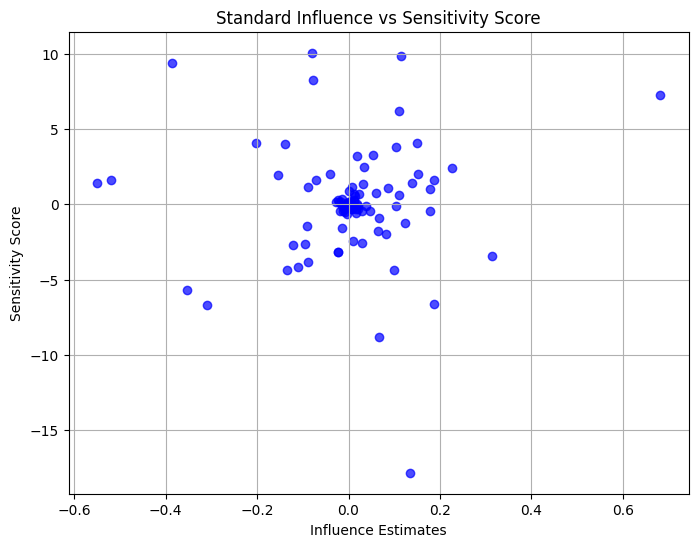

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(std_influences, meta_influences, color='blue', alpha=0.7)
plt.xlabel("Influence Estimates")
plt.ylabel("Sensitivity Score")
plt.title("Standard Influence vs Sensitivity Score")
plt.grid(True)
plt.show()

In [ ]:
top_k = 10
top_indices = np.argsort(np.abs(std_influences))[-top_k:][::-1]  # Sort by magnitude (descending)

def plot_top_influential(images, labels, scores, meta_scores, indices, title, variant="normal"):
    plt.figure(figsize=(top_k, 2.5))
    for i, idx in enumerate(indices):
        plt.subplot(1, top_k, i + 1)
        plt.imshow(images[idx])
        if(variant == "adjusted"):
            plt.title(f"Inf:{scores[idx]:.2f}\nPrev={meta_scores[idx]:.2f}", fontsize=8)
        else:
            plt.title(f"Inf:{scores[idx]:.2f}\nμ={meta_scores[idx]:.2f}", fontsize=8)
        plt.axis("off")
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

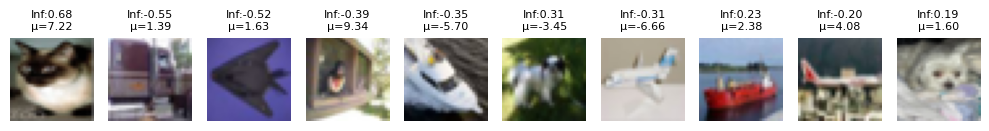

In [ ]:
plot_top_influential(train_images_subset, train_labels_subset, std_influences, meta_influences, top_indices, "")

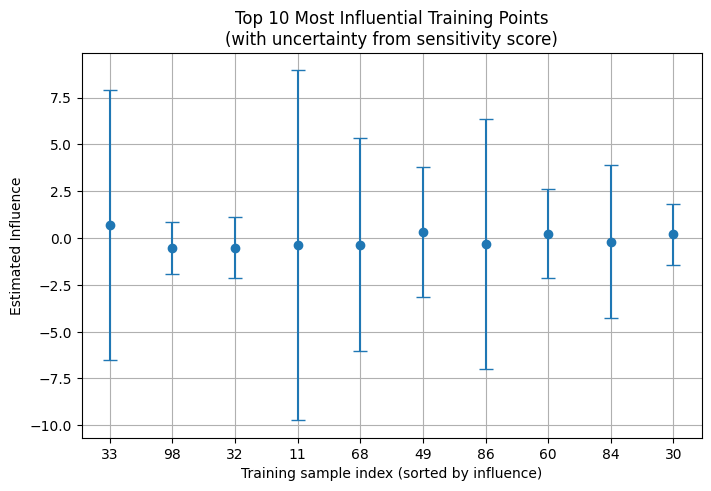

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

top10_std = std_influences[top_indices]
top10_meta = meta_influences[top_indices]

plt.figure(figsize=(8, 5))
plt.errorbar(np.arange(10), top10_std, yerr=np.abs(top10_meta), fmt='o', capsize=5)
plt.xticks(np.arange(10), top_indices)
plt.xlabel("Training sample index (sorted by influence)")
plt.ylabel("Estimated Influence")
plt.title("Top 10 Most Influential Training Points\n(with uncertainty from sensitivity score)")
plt.grid(True)
plt.show()


Best Pearson threshold: 0.294 (r = 0.850)
Best Spearman threshold: 1.025 (ρ = 0.595)
Best Trade-off threshold: 1.025 (r = 0.767, ρ = 0.595)


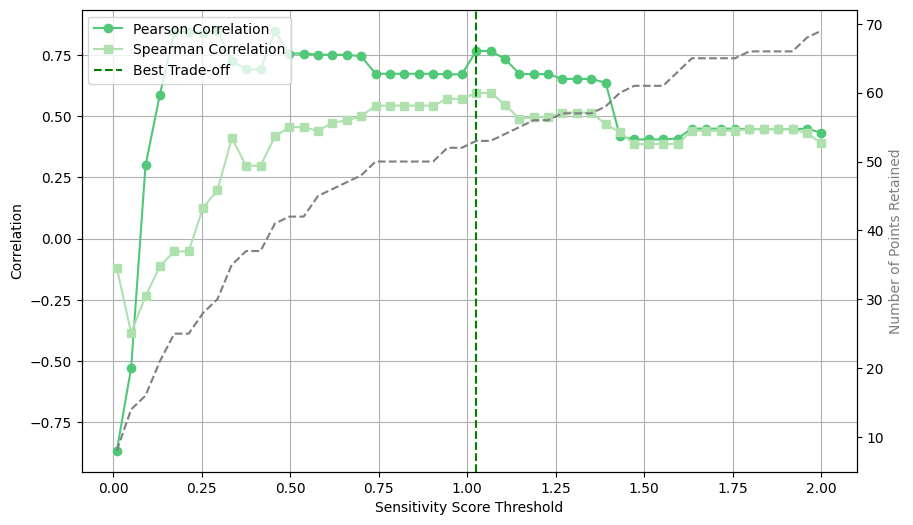

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

thresholds = np.linspace(0.01, 2.0, 50)
pearson_corrs = []
spearman_corrs = []
num_points_retained = []

for t in thresholds:
    mask = np.abs(meta_influences) < t
    retained = np.sum(mask)
    num_points_retained.append(retained)

    if retained < 2:
        pearson_corrs.append(np.nan)
        spearman_corrs.append(np.nan)
    else:
        std_filtered = std_influences[mask]
        gt_filtered = ground_truth_influences[mask]
        p_corr, _ = pearsonr(std_filtered, gt_filtered)
        s_corr, _ = spearmanr(std_filtered, gt_filtered)
        pearson_corrs.append(p_corr)
        spearman_corrs.append(s_corr)

# Find best
pearson_corrs = np.array(pearson_corrs)
spearman_corrs = np.array(spearman_corrs)

best_pearson_idx = np.nanargmax(pearson_corrs)
best_spearman_idx = np.nanargmax(spearman_corrs)

# Trade-off: Spearman + Pearson
combined = pearson_corrs + spearman_corrs
best_tradeoff_idx = np.nanargmax(combined)

print(f"Best Pearson threshold: {thresholds[best_pearson_idx]:.3f} (r = {pearson_corrs[best_pearson_idx]:.3f})")
print(f"Best Spearman threshold: {thresholds[best_spearman_idx]:.3f} (ρ = {spearman_corrs[best_spearman_idx]:.3f})")
print(f"Best Trade-off threshold: {thresholds[best_tradeoff_idx]:.3f} (r = {pearson_corrs[best_tradeoff_idx]:.3f}, ρ = {spearman_corrs[best_tradeoff_idx]:.3f})")

fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = '#50C878'
ax1.set_xlabel("Sensitivity Score Threshold")
ax1.set_ylabel("Correlation", color="#000000")
ax1.plot(thresholds, pearson_corrs, label="Pearson Correlation", marker="o", color=color1)
ax1.plot(thresholds, spearman_corrs, label="Spearman Correlation", marker="s", color="#AFE1AF")
ax1.axvline(thresholds[best_tradeoff_idx], linestyle='--', color='green', label='Best Trade-off')
ax1.tick_params(axis='y', labelcolor="#000000")
ax1.legend(loc="upper left")
ax1.grid(True)

ax2 = ax1.twinx()
color2 = 'tab:gray'
ax2.set_ylabel("Number of Points Retained", color=color2)
ax2.plot(thresholds, num_points_retained, label="# Points Retained", linestyle="--", color=color2)


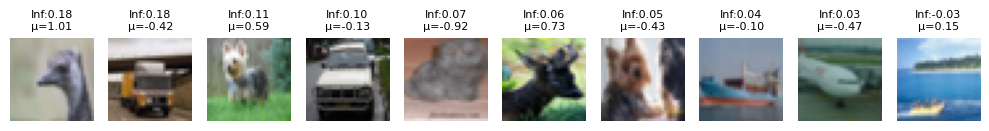

In [ ]:
best_mask = np.abs(meta_influences) < thresholds[best_tradeoff_idx]

filtered_std = std_influences[best_mask]
filtered_meta = meta_influences[best_mask]
filtered_images = train_images_subset[best_mask]
filtered_labels = train_labels_subset[best_mask]

top_indices = np.argsort(np.abs(filtered_std))[-top_k:][::-1]

plot_top_influential(filtered_images, filtered_labels, filtered_std, filtered_meta, top_indices, title="")


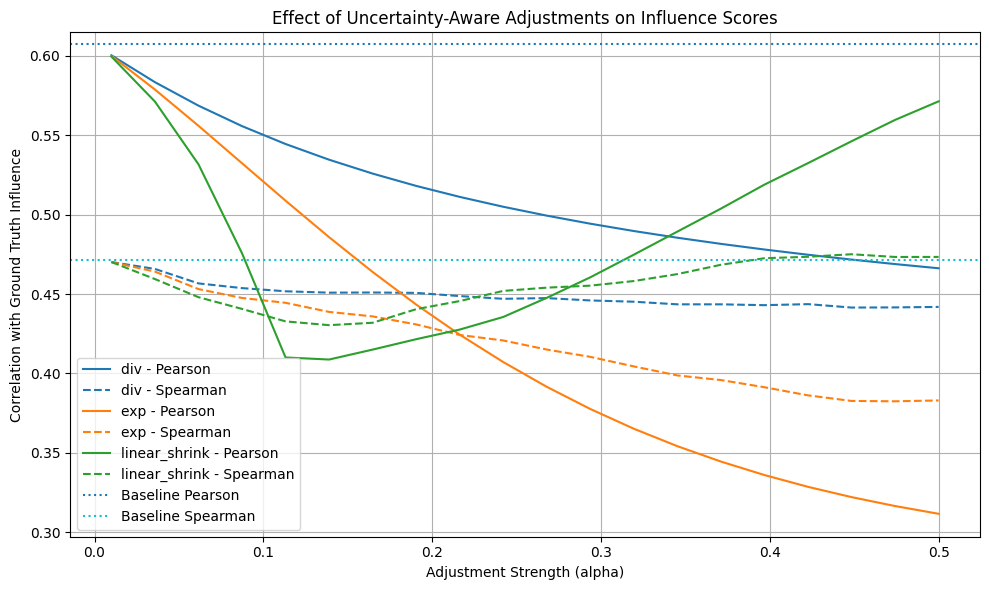

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

adjustment_strengths = np.linspace(0.01, 0.5, 20)
strategies = ['div', 'exp', 'linear_shrink']

results = {s: {'pearson': [], 'spearman': []} for s in strategies}

for alpha in adjustment_strengths:
    # Strategies
    adj1 = std_influences / (1 + alpha * np.abs(meta_influences))  
    adj2 = std_influences * np.exp(-alpha * np.abs(meta_influences))  
    adj3 = std_influences * np.clip((1 - alpha * np.abs(meta_influences)), 0.2, 1.0)  # linear_shrink

    for name, adj in zip(strategies, [adj1, adj2, adj3]):
        p_corr, _ = pearsonr(adj, ground_truth_influences)
        s_corr, _ = spearmanr(adj, ground_truth_influences)
        results[name]['pearson'].append(p_corr)
        results[name]['spearman'].append(s_corr)

# Baseline
pearson_base, _ = pearsonr(std_influences, ground_truth_influences)
spearman_base, _ = spearmanr(std_influences, ground_truth_influences)

strategy_colors = {
    'div': 'tab:blue',
    'exp': 'tab:orange',
    'linear_shrink': 'tab:green'
}

# Plotting
plt.figure(figsize=(10, 6))
for name in strategies:
    color = strategy_colors[name]
    # Plot Pearson with solid line
    plt.plot(adjustment_strengths, results[name]['pearson'], 
             color=color, linestyle='-', label=f'{name} - Pearson')
    # Plot Spearman with dashed line using the same color
    plt.plot(adjustment_strengths, results[name]['spearman'], 
             color=color, linestyle='--', label=f'{name} - Spearman')

# Baseline lines (unchanged from original)
plt.axhline(pearson_base, linestyle=':', color='tab:blue', label='Baseline Pearson')
plt.axhline(spearman_base, linestyle=':', color='tab:cyan', label='Baseline Spearman')

plt.xlabel("Adjustment Strength (alpha)")
plt.ylabel("Correlation with Ground Truth Influence")
plt.title("Effect of Uncertainty-Aware Adjustments on Influence Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Best alpha: 0.01
Associated Pearson score: 0.6002203160944705
Associated Spearman score: 0.47012301230123005


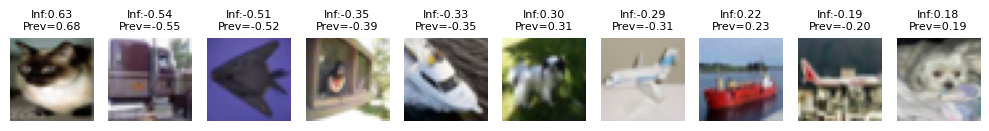

In [ ]:
strategy = "div"
avg_corrs = np.array(results[strategy]['pearson']) + np.array(results[strategy]['spearman'])
best_idx = np.argmax(avg_corrs)
best_alpha = adjustment_strengths[best_idx]

best_pearson = results[strategy]['pearson'][best_idx]
best_spearman = results[strategy]['spearman'][best_idx]

print("Best alpha:", best_alpha)
print("Associated Pearson score:", best_pearson)
print("Associated Spearman score:", best_spearman)

adjusted_scores = std_influences * np.clip((1 - best_alpha * np.abs(meta_influences)), 0.2, 1.0)

top_indices = np.argsort(-np.abs(adjusted_scores))[:top_k]
plot_top_influential(train_images_subset, train_labels_subset, adjusted_scores, std_influences, top_indices, title="", variant="adjusted")
